In [1]:
# Capston Instacart Market Basket Analysis
#Instacart is a U.S. based company that provides same-day grocery delivery service. 
#It provides the customers an option to choose the grocery store they want their groceries from, 
#browse through the item list, select the items and get it hand-delivered by a personal shopper. 
#The company offers the services both through their website as well their app.

#They have over 3 million transactional data of multiple shoppers located across the United States. 
#Instacart wants to leverage this data to build a model that can predict which previously purchased products 
#will be in a user’s next order. 
#This will help the company strategize where to show the previously ordered items on their page or app.  
#The model will also help recommend items for users while they are browsing.


# Data Wrangling for Instacart Market Basket Analysis
#reading the files one by one

In [106]:
#Step 1 - Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

#1
#aisles.csv


In [3]:
#Step 2 - reading the files
#files provided - aisles, products,departments,orders_prior,orders

aisles = pd.read_csv('aisles.csv')

In [7]:
aisles.info()
#aisles has no null values or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [9]:
#2 importing the departments file
departments= pd.read_csv('departments.csv')

In [10]:
departments.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [11]:
#3 importing the products file
#products
products =pd.read_csv("products.csv")

In [12]:
products.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
#4 orders_prior
#importing the orders_prior file
orders_prior =pd.read_csv("order_products__prior.csv")

In [20]:
orders_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [75]:
#5
#importing the orders_train file
order_train = pd.read_csv('order_products__train.csv')
order_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [72]:
# 6
# importing orders file
order_products_train
orders.info()
orders.head()
orders.eval_set.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


array(['prior', 'train', 'test'], dtype=object)

In [23]:
# Step 3  - Merging files
#merging product with aisle and department files

products_a = pd.merge(products,aisles,on='aisle_id')

In [24]:
products_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 5 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
aisle            49688 non-null object
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [40]:
# merging with products file
products_all =pd.merge(products_a,departments,left_on = 'department_id'
                       ,right_on = 'department_id',how='left',suffixes = ('_x', '_y'))

In [41]:
products_all.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


In [42]:
products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
aisle            49688 non-null object
department       49688 non-null object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [49]:
#Step 4 - Looking for null or missing values
#Looking for unique and duplicate items in all new dataframes

#products_all

print("Products all dimensions : {}".format(products_all.shape))
print("Missing values in column product_id in products all tables : {}".
      format(products_all['product_id'].isnull().sum()))
print("Missing values in column product_name in products all tables : {}".
      format(products_all['product_name'].isnull().sum()))
print("Missing values in column aisle_id in products all tables : {}".
      format(products_all['aisle_id'].isnull().sum()))
print("Missing values in column department_id in products all tables : {}".
      format(products_all['department_id'].isnull().sum()))
print("Missing values in column aisle in products all tables : {}".
      format(products_all['aisle'].isnull().sum()))
print("Missing values in column department in products all tables : {}".
      format(products_all['department'].isnull().sum()))

Products all dimensions : (49688, 6)
Missing values in column product_id in products all tables : 0
Missing values in column product_name in products all tables : 0
Missing values in column aisle_id in products all tables : 0
Missing values in column department_id in products all tables : 0
Missing values in column aisle in products all tables : 0
Missing values in column department in products all tables : 0


In [51]:
#checking orders_prior info
orders_prior.info()
print("Products all dimensions : {}".format(orders_prior.shape))
print("Missing values in column product_id in orders_prior all tables : {}".
      format(orders_prior['product_id'].isnull().sum()))
print("Missing values in column order_id in orders_prior all tables : {}".
      format(orders_prior['order_id'].isnull().sum()))
print("Missing values in column add_to_cart_order in orders_prior all tables : {}".
      format(orders_prior['add_to_cart_order'].isnull().sum()))
print("Missing values in column reordered in orders_prior all tables : {}".
      format(orders_prior['reordered'].isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB
Products all dimensions : (32434489, 4)
Missing values in column product_id in orders_prior all tables : 0
Missing values in column order_id in orders_prior all tables : 0
Missing values in column add_to_cart_order in orders_prior all tables : 0
Missing values in column reordered in orders_prior all tables : 0


In [61]:
products_all.info()
products_all=products_all.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
aisle            49688 non-null object
department       49688 non-null object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [62]:
orders_prior=orders_prior.drop_duplicates()
orders_prior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 1.2 GB


In [57]:
#Step 6 - creating a master dataset with orders_prior and products
#merge products_all and orders_prior table

orders_prior_p =pd.merge(products_all,orders_prior,left_on = 'product_id',
                         right_on = 'product_id',how='left',suffixes = ('_x', '_y'))
orders_prior_p.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107.0,7.0,0.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319.0,3.0,1.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540.0,4.0,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228.0,2.0,0.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9273.0,30.0,0.0


In [65]:
orders_prior_p=orders_prior_p.drop_duplicates()

In [66]:
orders_prior_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434500 entries, 0 to 32434499
Data columns (total 9 columns):
product_id           int64
product_name         object
aisle_id             int64
department_id        int64
aisle                object
department           object
order_id             float64
add_to_cart_order    float64
reordered            float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.4+ GB


In [78]:
#merge products_all and orders_prior table
orders_train_p =pd.merge(products_all,order_train,left_on = 'product_id',
                         right_on = 'product_id',how='left',suffixes = ('_x', '_y'))
orders_train_p.head()
orders_train_p=orders_train_p.drop_duplicates()
orders_train_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395182 entries, 0 to 1395181
Data columns (total 9 columns):
product_id           1395182 non-null int64
product_name         1395182 non-null object
aisle_id             1395182 non-null int64
department_id        1395182 non-null int64
aisle                1395182 non-null object
department           1395182 non-null object
order_id             1384617 non-null float64
add_to_cart_order    1384617 non-null float64
reordered            1384617 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 106.4+ MB


In [53]:
#checking orders_prior info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


<B> Exploratory Analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395182 entries, 0 to 1395181
Data columns (total 9 columns):
product_id           1395182 non-null int64
product_name         1395182 non-null object
aisle_id             1395182 non-null int64
department_id        1395182 non-null int64
aisle                1395182 non-null object
department           1395182 non-null object
order_id             1384617 non-null float64
add_to_cart_order    1384617 non-null float64
reordered            1384617 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 146.4+ MB


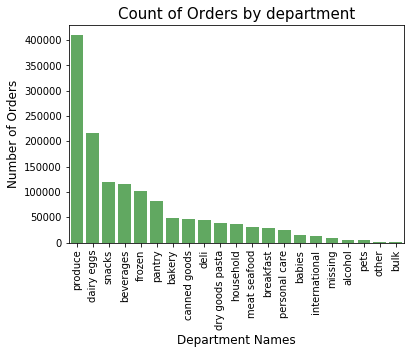

In [145]:
#look for Outliers
orders_train_p.info()
#calculate number of orders by departments
cnt_1 = orders_train_p.department.value_counts()
sns.barplot(cnt_1.index, cnt_1.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Department Names', fontsize=12)
plt.title('Count of Orders by department', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


#s=orders_train_p.groupby("department",axis=0).agg(np.size)
#pd.value_counts(s).plot(kind="bar")
#print(s)
#s = orders_train_p.groupby("departments")#.ids.agg(lambda x:len(x.unique()))
#pd.value_counts(s).plot(kind="bar")

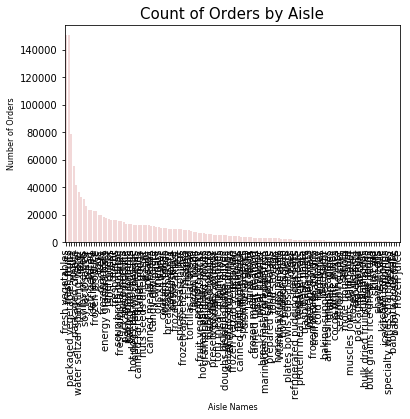

In [113]:
#calculate number of orders by aisles
cnt_1 = orders_train_p.aisle.value_counts()
sns.barplot(cnt_1.index, cnt_1.values, alpha=0.2, color=color[3])
plt.ylabel('Number of Orders', fontsize=8)
plt.xlabel('Aisle Names', fontsize=8)
plt.title('Count of Orders by Aisle', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
# as we can see below, the below graph is not very help

In [122]:
# we have already noticed that there are three files with order information - order_priors, order_train and orders
# we need to find the difference between these three files
#orders_train_p.info() #1,395,182 rows
#orders_prior_p.info() #32,434,500 rows
#orders.info()         #3,421,083 rows

# it looks like orders_prior is huge dataset which has all the prior customer orders.
#checking orders.info()
count_total = orders.groupby("eval_set")["user_id"].agg(np.size)
count_total


eval_set
prior    3214874
test       75000
train     131209
Name: user_id, dtype: int64

In [128]:
orders_train_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395182 entries, 0 to 1395181
Data columns (total 9 columns):
product_id           1395182 non-null int64
product_name         1395182 non-null object
aisle_id             1395182 non-null int64
department_id        1395182 non-null int64
aisle                1395182 non-null object
department           1395182 non-null object
order_id             1384617 non-null float64
add_to_cart_order    1384617 non-null float64
reordered            1384617 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 146.4+ MB


In [134]:
#orders table - merge with orders_train to get other variables
orders_all = pd.merge(orders_train_p,orders,left_on= 'order_id',right_on='order_id',how="inner")
orders_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
product_id                1384617 non-null int64
product_name              1384617 non-null object
aisle_id                  1384617 non-null int64
department_id             1384617 non-null int64
aisle                     1384617 non-null object
department                1384617 non-null object
order_id                  1384617 non-null float64
add_to_cart_order         1384617 non-null float64
reordered                 1384617 non-null float64
user_id                   1384617 non-null int64
eval_set                  1384617 non-null object
order_number              1384617 non-null int64
order_dow                 1384617 non-null int64
order_hour_of_day         1384617 non-null int64
days_since_prior_order    1384617 non-null float64
dtypes: float64(4), int64(7), object(4)
memory usage: 169.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384

In [135]:
count_total = orders_all.groupby("eval_set")["user_id"].agg(np.size)
count_total

eval_set
train    1384617
Name: user_id, dtype: int64

In [140]:
#subset the training dataset from the orders table

orders_train_sub = orders[(orders['eval_set'] == 'train')]
#df[(df['nationality'] == "USA")]
count_total = orders_train_sub.groupby("eval_set")["user_id"].agg(np.size)
count_total

eval_set
train    131209
Name: user_id, dtype: int64

In [141]:
orders_train_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131209 entries, 10 to 3421082
Data columns (total 7 columns):
order_id                  131209 non-null int64
user_id                   131209 non-null int64
eval_set                  131209 non-null object
order_number              131209 non-null int64
order_dow                 131209 non-null int64
order_hour_of_day         131209 non-null int64
days_since_prior_order    131209 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 8.0+ MB


In [142]:
#join with order_train table to get other details

orders_train_sub1 =pd.merge(orders_train_sub,orders_train_p,left_on= 'order_id',right_on='order_id',how="left")

In [144]:
orders_train_sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
order_id                  1384617 non-null int64
user_id                   1384617 non-null int64
eval_set                  1384617 non-null object
order_number              1384617 non-null int64
order_dow                 1384617 non-null int64
order_hour_of_day         1384617 non-null int64
days_since_prior_order    1384617 non-null float64
product_id                1384617 non-null int64
product_name              1384617 non-null object
aisle_id                  1384617 non-null int64
department_id             1384617 non-null int64
aisle                     1384617 non-null object
department                1384617 non-null object
add_to_cart_order         1384617 non-null float64
reordered                 1384617 non-null float64
dtypes: float64(3), int64(8), object(4)
memory usage: 169.0+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395182 entries, 0 to 1395181
Data columns (total 9 columns):
product_id           1395182 non-null int64
product_name         1395182 non-null object
aisle_id             1395182 non-null int64
department_id        1395182 non-null int64
aisle                1395182 non-null object
department           1395182 non-null object
order_id             1384617 non-null float64
add_to_cart_order    1384617 non-null float64
reordered            1384617 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 146.4+ MB


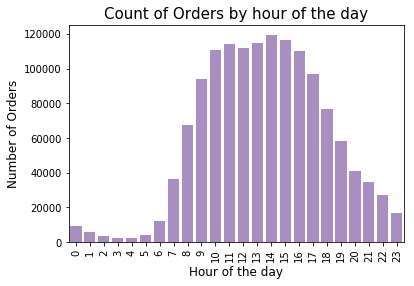

In [148]:
# explore the orders train dataset
#orders_train_sub1

orders_train_p.info()
#calculate Count of Orders by hour of the day
cnt_1 = orders_train_sub1.order_hour_of_day.value_counts()
sns.barplot(cnt_1.index, cnt_1.values, alpha=0.8, color=color[4])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Hour of the day', fontsize=12)
plt.title('Count of Orders by hour of the day', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

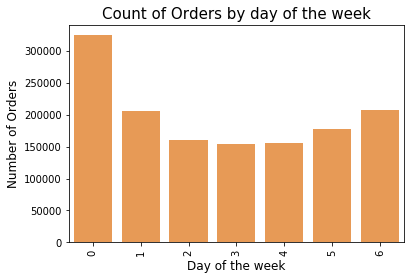

In [153]:
#calculate Count of Orders by hour of the day
cnt_1 = orders_train_sub1.order_dow.value_counts()
sns.barplot(cnt_1.index, cnt_1.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day of the week', fontsize=12)
plt.title('Count of Orders by day of the week', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

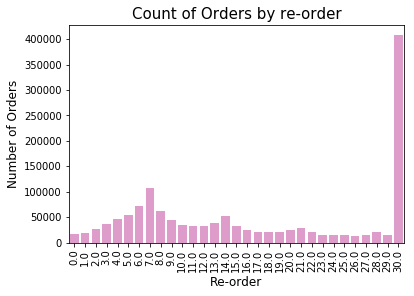

In [155]:
#calculate Count of Orders by re-order of the day
cnt_1 = orders_train_sub1.days_since_prior_order.value_counts()
sns.barplot(cnt_1.index, cnt_1.values, alpha=0.8, color=color[6])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Re-order', fontsize=12)
plt.title('Count of Orders by re-order', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()